In [33]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sn

In [22]:
candidates = read_csv('Data/toi-catalog.csv', comment='#')
known = read_csv('Data/Cross_Ref.csv',comment='#')

In [23]:
candidates.keys()

Index(['Source Pipeline', 'TIC', 'Full TOI ID', 'TOI Disposition',
       'TIC Right Ascension', 'TIC Declination', 'TMag Value',
       'TMag Uncertainty', 'Epoch Value', 'Epoch Error',
       'Orbital Period Value', 'Orbital Period Error',
       'Transit Duration Value', 'Transit Duration Error',
       'Transit Depth Value', 'Transit Depth Error', 'Sectors',
       'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise', 'Centroid Offset',
       'TFOP Master', 'TFOP SG1a', 'TFOP SG1b', 'TFOP SG2', 'TFOP SG3',
       'TFOP SG4', 'TFOP SG5', 'Alerted', 'Updated'],
      dtype='object')

In [24]:
tic_id = candidates['TIC']
TOI = candidates['Full TOI ID']
disposition = candidates['TOI Disposition']
Tmag = candidates['TMag Value']
epoch = candidates['Epoch Value']
Period = candidates['Orbital Period Value']
dPeriod = candidates['Orbital Period Error']
Duration = candidates['Transit Duration Value']
Depth = candidates['Transit Depth Value']
R_s = np.array(candidates['Star Radius Value'])
dR_s = np.array(candidates['Star Radius Error'])
R_p = candidates['Planet Radius Value']
dR_p = candidates['Planet Radius Error']
Insolation = candidates['Effective Stellar Flux Value']
T_eq = candidates['Planet Equilibrium Temperature (K) Value']
T_eff = np.array(candidates['Effective Temperature Value'])
#logg = candidates['logg']
RA = candidates['TIC Right Ascension']
Dec = candidates['TIC Declination']
sectors = candidates['Sectors']

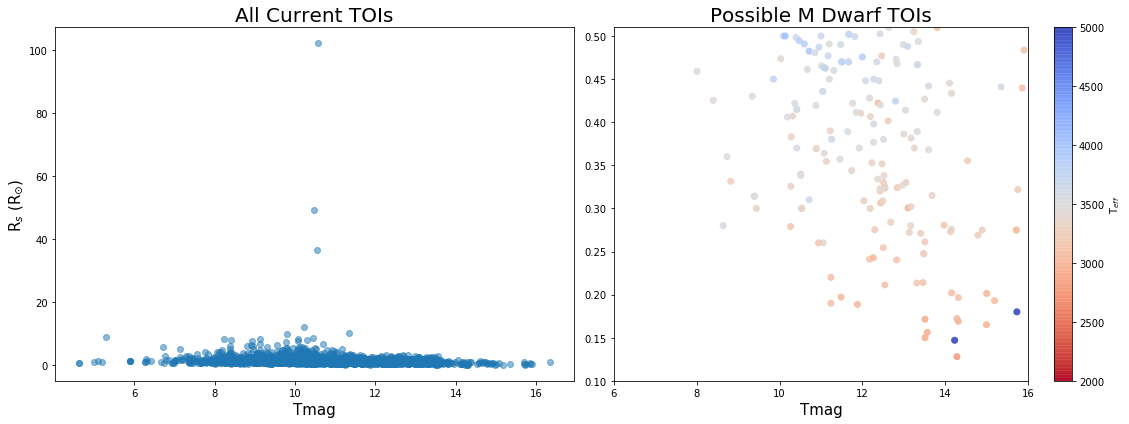

In [25]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(Tmag, R_s, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2000, vmax=5000)

ax1.scatter(Tmag, R_s, alpha=0.5)
ax1.set_ylabel(r'R$_s$ (R$_{\odot}$)', fontsize=15)
ax1.set_xlabel('Tmag',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)

fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('Tmag',fontsize=15)
ax2.set_title('Possible M Dwarf TOIs',fontsize=20)
ax2.set_ylim(0.1,0.51)
ax2.set_xlim(6,16)

plt.tight_layout()
plt.savefig('Figs/rs_tmag_plots.pdf')
plt.show()

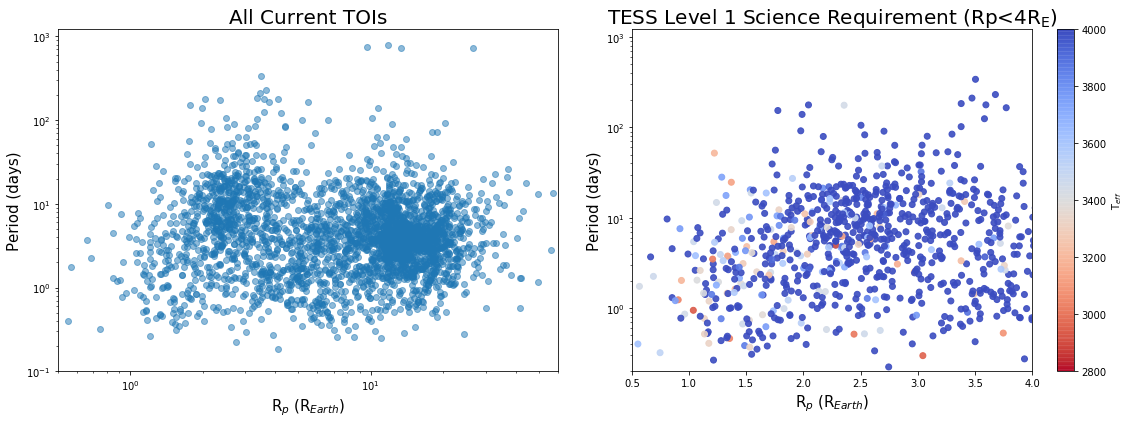

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)
points = plt.scatter(R_p, Period, alpha=0.9, c=T_eff, cmap="coolwarm_r", vmin=2800, vmax=4000)

ax1.scatter(R_p, Period, alpha=0.5)
ax1.set_ylabel('Period (days)', fontsize=15)
ax1.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax1.set_title('All Current TOIs',fontsize=20)
ax1.set_xscale('log')
ax1.set_xlim(5e-1,60)
ax1.set_yscale('log')
ax1.set_ylim(1e-1,)

#ax2.scatter(R_p, Period, alpha=0.5)
fig.colorbar(points, label='T$_{eff}$')
ax2.set_xlabel('R$_p$ (R$_{Earth}$)',fontsize=15)
ax2.set_ylabel('Period (days)', fontsize=15)
ax2.set_title(r'TESS Level 1 Science Requirement (Rp<4R$_{\rm{E}}$)',fontsize=20)
ax2.set_xlim(0.5,4)
ax2.set_yscale('log')
ax2.set_ylim(2e-1,)

plt.tight_layout()
plt.savefig('Figs/rp_period_plots.pdf')
plt.show()

In [27]:
indices = []
for i in range(len(Tmag)):
    if ( ((R_s[i]-dR_s[i]) <= 0.5) and (R_s[i] != R_s[i]) ) or (T_eff[i]<= 4000.0) or (R_s[i] <= 0.5):
        #print('{:.4f} {:.4f} {:.3f} {}'.format(R_s[i], dR_s[i], (R_s[i]-dR_s[i]), T_eff[i]))
        indices.append(i)

In [32]:
tics = tic_id[indices]
tois = TOI[indices]
len(tois)

282

In [31]:
print(tois[250:])

2410    2406.01
2418    2415.01
2439    2433.01
2441    2445.01
2442    2444.01
2445    2441.01
2465    2455.01
2467    2453.01
2469    2451.01
2504    2496.01
2505    2495.01
2618    2605.01
2620    2603.01
2622    2610.01
2650    2640.01
2756    2781.01
2959    2952.01
3056    3088.01
3080    3064.01
3085    3059.01
3115    3029.01
3157    3235.01
3169    3223.01
3172    3220.01
3176    3216.01
3179    3213.01
3239    3153.01
3286    3333.01
3287    3332.01
3306    3313.01
3307    3312.01
3331    3288.01
Name: Full TOI ID, dtype: float64


In [30]:
set(tois).difference(known['TOI'])

{2640.01,
 2781.01,
 2952.01,
 3029.01,
 3059.01,
 3064.01,
 3088.01,
 3153.01,
 3213.01,
 3216.01,
 3220.01,
 3223.01,
 3235.01,
 3288.01,
 3312.01,
 3313.01,
 3332.01,
 3333.01}

In [12]:
planet = 2505

print(tic_id[planet])
print(TOI[planet])
print(disposition[planet])
print(Period[planet])
print(dPeriod[planet])
print(epoch[planet])
print(Duration[planet])
print(RA[planet])
print(Dec[planet])
print(Tmag[planet])
print(Depth[planet])
print(R_p[planet])
print(dR_p[planet])
print(R_s[planet])
print(dR_s[planet])
print(T_eff[planet])
print(sectors[planet])

33091590
2495.01
PC
7.7953850000000005
0.0030239999999999998
2208.384505
1.694157
104.826976
-4.828231
12.2285
2783.912923
1.8939259999999998
1.366295
0.35290900000000003
0.010681999999999999
3356.0
33
